In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import pickle

In [29]:
diabetes=pd.read_csv("diabetes.csv")

In [30]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [31]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


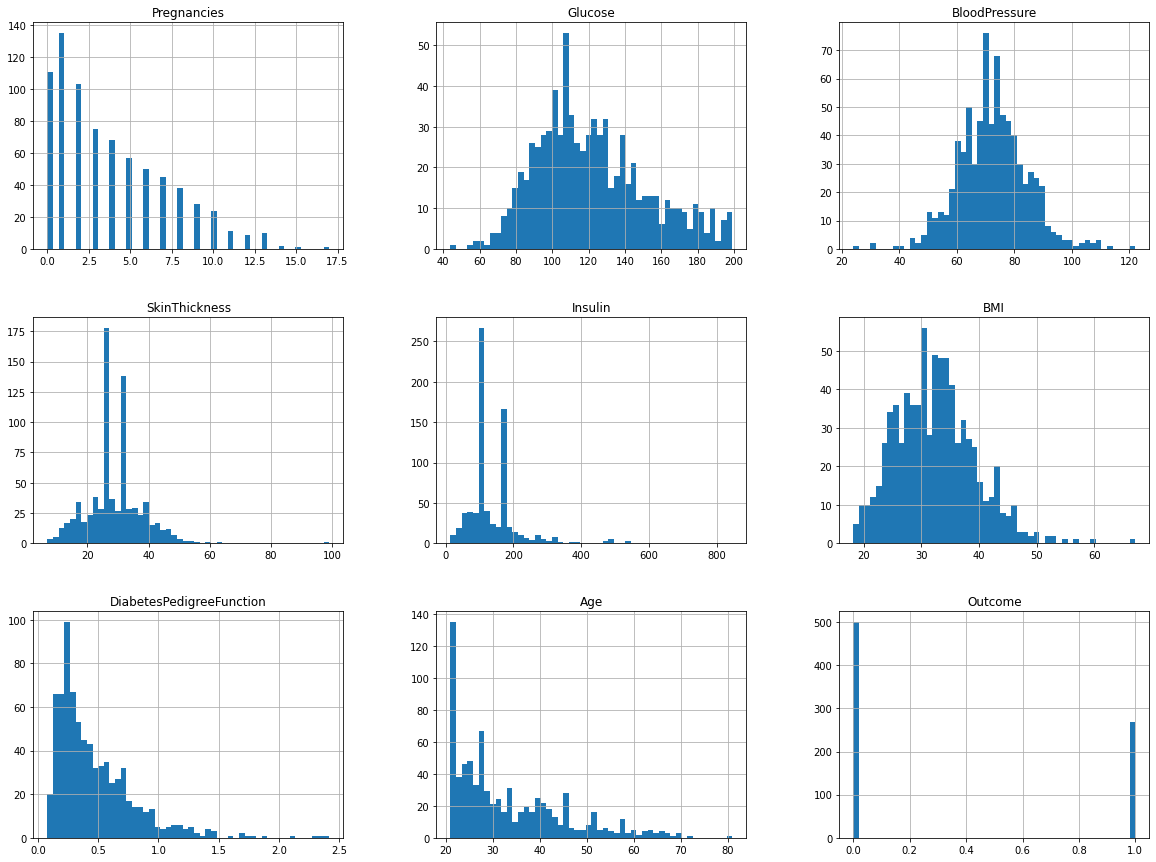

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
diabetes.hist(bins=50,figsize=(20,15))#bins is used for the width of histogram line
plt.show()

In [34]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


In [35]:
diabetes=diabetes.drop('Pregnancies',axis=1)
diabetes=diabetes.drop('SkinThickness',axis=1)

In [36]:
print(diabetes[diabetes.BloodPressure<40].shape[0])
print(diabetes[diabetes.Insulin<25].shape[0])

4
8


In [37]:
diabetes=diabetes[diabetes.BloodPressure>40]
diabetes=diabetes[diabetes.Insulin>25]

In [38]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   755 non-null    int64  
 1   BloodPressure             755 non-null    float64
 2   Insulin                   755 non-null    float64
 3   BMI                       755 non-null    float64
 4   DiabetesPedigreeFunction  755 non-null    float64
 5   Age                       755 non-null    int64  
 6   Outcome                   755 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 47.2 KB


In [39]:
corr_mat=diabetes.corr()
corr_mat.Outcome.sort_values(ascending=True)

DiabetesPedigreeFunction    0.159757
BloodPressure               0.180105
Age                         0.237790
BMI                         0.306476
Insulin                     0.375708
Glucose                     0.493894
Outcome                     1.000000
Name: Outcome, dtype: float64

# Normalizing the data

In [40]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = diabetes.columns
d = scaler.fit_transform(diabetes)
scaled_diabetes = pd.DataFrame(d, columns=names)

In [41]:
scaled_diabetes.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.670968,0.358974,0.171971,0.314928,0.243892,0.483333,1.0
1,0.264516,0.282051,0.089963,0.171779,0.121279,0.166667,0.0
2,0.896774,0.256410,0.171971,0.104294,0.263883,0.183333,1.0
3,0.290323,0.282051,0.079559,0.202454,0.039538,0.000000,0.0
4,0.464516,0.384615,0.089963,0.151329,0.054642,0.150000,0.0


In [42]:
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))#randomly permute a sequence or return a permuted range
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [43]:
diabetes_train_set,diabetes_test_set=split_train_test(scaled_diabetes,0.2)

In [44]:
len(diabetes_train_set)

604

In [45]:
len(diabetes_test_set)

151

In [46]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix

In [47]:
def compute_cost(W, X, Y, regularization_strength):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost


# I haven't tested it but this same function should work for
# vanilla and mini-batch gradient descent as well
def calculate_cost_gradient(W, X_batch, Y_batch, regularization_strength):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  # gives multidimensional array

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)  # average
    return dw


def sgd(features, outputs, learning_rate, regularization_strength):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind], regularization_strength)
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth+1 or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs, regularization_strength)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

In [48]:
diabetes_train_set1=diabetes_train_set.drop("Outcome",axis=1)
diabetes_train_set_labels=diabetes_train_set.Outcome.copy()
diabetes_test_set1=diabetes_test_set.drop("Outcome",axis=1)
diabetes_test_set_labels=list(diabetes_test_set.Outcome.copy())
diabetes_test_set1.insert(loc=len(diabetes_test_set1.columns), column='intercept', value=1)
diabetes_train_set1.insert(loc=len(diabetes_train_set1.columns), column='intercept', value=1)

In [49]:
W = sgd(diabetes_train_set1.to_numpy(),diabetes_train_set_labels.to_numpy(),0.0001,10000)
y_train_predicted = np.array([])
for i in range(diabetes_test_set1.shape[0]):
       if np.dot(diabetes_test_set1.to_numpy()[i], W)<1.5:
              y_train_predicted = np.append(y_train_predicted, 0)
       else:
              y_train_predicted = np.append(y_train_predicted, 1)


Epoch is: 2 and Cost is: 6424.749914903958
Epoch is: 3 and Cost is: 6424.64649247025


In [51]:

print(confusion_matrix(y_train_predicted,diabetes_test_set_labels))
print(accuracy_score(y_train_predicted,diabetes_test_set_labels))
print(precision_score(y_train_predicted,diabetes_test_set_labels))
print(recall_score(y_train_predicted,diabetes_test_set_labels))
print(f1_score(y_train_predicted,diabetes_test_set_labels))

[[81 14]
 [21 35]]
0.7682119205298014
0.7142857142857143
0.625
0.6666666666666666


In [61]:
filename="diabetes.pkl"
pickle.dump(W,open(filename,'wb'))